### Prediction of TF-co-occurences for different cell lines (e.g. A375_enhancers.bed) and theire enhancer regions
e.g. Data example:
chr1	100503870	100506200	RP4-714D9.5,HIAT1

In [2]:
from tfcomb import CombObj
C = CombObj()


### Find bindings sites for TF in region with the binding sites of the Hocomoco File
Todo:Things to iterate
Use another motif file?
Use another genome file?

In [3]:
C.TFBS_from_motifs(regions="../testdaten/enhancers/A375_enhancers.bed",
                   motifs="../testdaten/HOCOMOCOv11_HUMAN_motifs.txt",
                   genome="../testdaten/hg19_masked.fa",
                   threads=4)

INFO: Scanning for TFBS with 4 thread(s)...
INFO: Progress: 9%
INFO: Progress: 18%
INFO: Progress: 27%
INFO: Progress: 37%
INFO: Progress: 45%
INFO: Progress: 55%
INFO: Progress: 65%
INFO: Progress: 73%
INFO: Progress: 82%
INFO: Progress: 91%
INFO: Finished!
INFO: Formatting scanned TFBS
INFO: Identified 1090429 TFBS (401 unique names) within given regions


In [4]:
C.TFBS[:10]

[chr1	874841	874855	KLF1	7.53394	-,
 chr1	874845	874855	KLF4	8.14366	-,
 chr1	874847	874857	SALL4	8.03032	-,
 chr1	874860	874882	ZNF341	8.38697	-,
 chr1	874860	874882	ZNF467	8.53969	-,
 chr1	874861	874883	MAZ	9.38904	-,
 chr1	874863	874882	KLF15	11.45194	-,
 chr1	874866	874885	KLF6	7.67825	-,
 chr1	874866	874888	PATZ1	9.59366	-,
 chr1	874867	874887	WT1	7.23058	-]

### Market Basket analyses for co-occurences:

In [6]:
C.market_basket(threads=10)

INFO: Market basket analysis is done! Results are found in <CombObj>.rules


In [15]:
C.rules.head()

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
SP1-SP2,SP1,SP2,7475,7961,9131,0.876735,95.099353
SP2-SP1,SP2,SP1,7475,9131,7961,0.876735,95.099353
SP3-SP2,SP3,SP2,7766,9122,9131,0.850929,91.266614
SP2-SP3,SP2,SP3,7766,9131,9122,0.850929,91.266614
SP3-SP1,SP3,SP1,6637,9122,7961,0.778831,70.941753


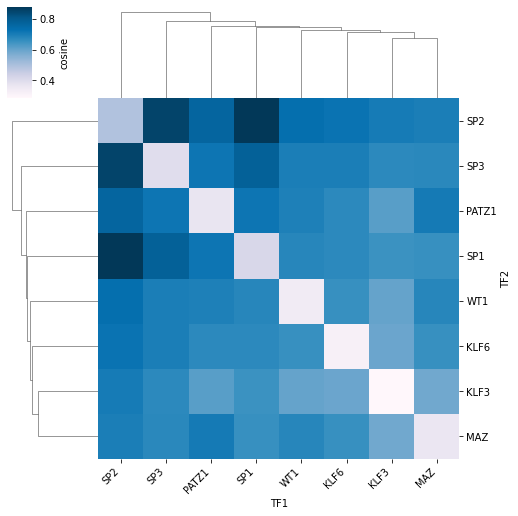

In [7]:
_ = C.plot_heatmap()

/home/stud6/.conda/envs/tfcomb_env/lib/python3.7/site-packages/tfcomb/plotting.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha="right")


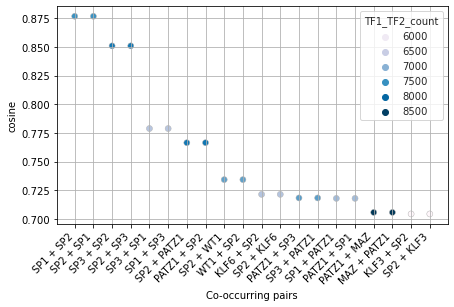

In [8]:
_ = C.plot_bubble()

INFO: x_threshold is None; trying to calculate optimal threshold
INFO: y_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of TFBS and rules using thresholds


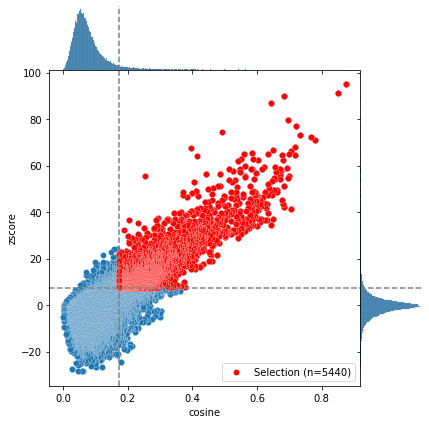

In [9]:
selected = C.select_significant_rules()

In [10]:
selected

<CombObj: 662248 TFBS (401 unique names) | Market basket analysis: 5440 rules>

In [11]:
selected.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
SP1-SP2,SP1,SP2,7475,7961,9131,0.876735,95.099353
SP2-SP1,SP2,SP1,7475,9131,7961,0.876735,95.099353
SP3-SP2,SP3,SP2,7766,9122,9131,0.850929,91.266614
SP2-SP3,SP2,SP3,7766,9131,9122,0.850929,91.266614
SP3-SP1,SP3,SP1,6637,9122,7961,0.778831,70.941753
...,...,...,...,...,...,...,...
ZNF467-ELK1,ZNF467,ELK1,667,12405,1211,0.172090,10.821837
ASCL1-NR2F1,ASCL1,NR2F1,669,3039,4976,0.172036,7.696565
NR2F1-ASCL1,NR2F1,ASCL1,669,4976,3039,0.172036,7.696565
PBX3-SP1,PBX3,SP1,632,1699,7961,0.171845,7.691911


In [12]:
top_rules_100 = C.select_top_rules(n=100)

In [13]:
top_rules_100.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
SP1-SP2,SP1,SP2,7475,7961,9131,0.876735,95.099353
SP2-SP1,SP2,SP1,7475,9131,7961,0.876735,95.099353
SP3-SP2,SP3,SP2,7766,9122,9131,0.850929,91.266614
SP2-SP3,SP2,SP3,7766,9131,9122,0.850929,91.266614
SP3-SP1,SP3,SP1,6637,9122,7961,0.778831,70.941753
...,...,...,...,...,...,...,...
VEZF1-WT1,VEZF1,WT1,7184,12131,10718,0.630030,36.736208
ZBTB17-MAZ,ZBTB17,MAZ,7560,11129,13064,0.626983,41.875239
MAZ-ZBTB17,MAZ,ZBTB17,7560,13064,11129,0.626983,41.875239
PATZ1-ZNF281,PATZ1,ZNF281,6485,11313,9475,0.626371,48.670190


In [14]:
top_rules_100.to_pickle("./results/A375_enhancers_selected_100.pkl")

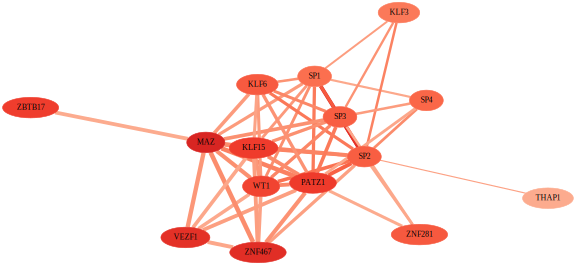

In [17]:
top_rules_100.plot_network()

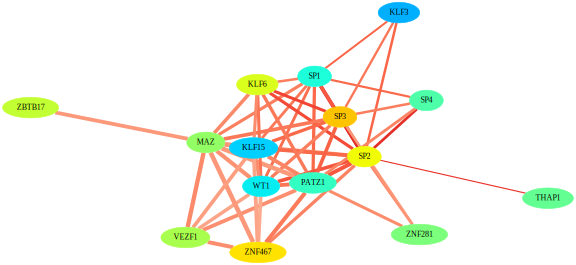

In [18]:
top_rules_100.plot_network(color_node_by="TF1", color_edge_by="zscore")

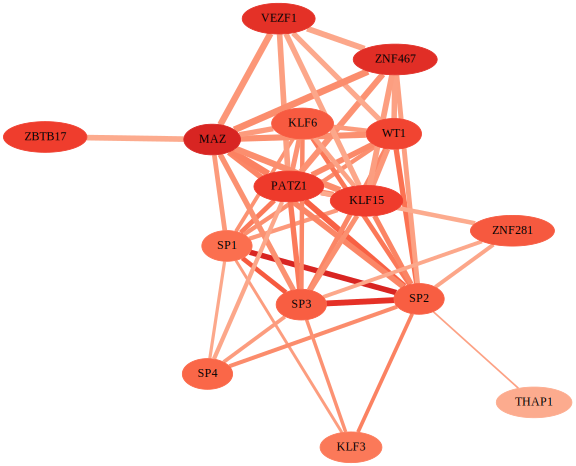

In [20]:
top_rules_100.plot_network(engine="fdp")

INFO: Finished! The network is found within <CombObj>.network.


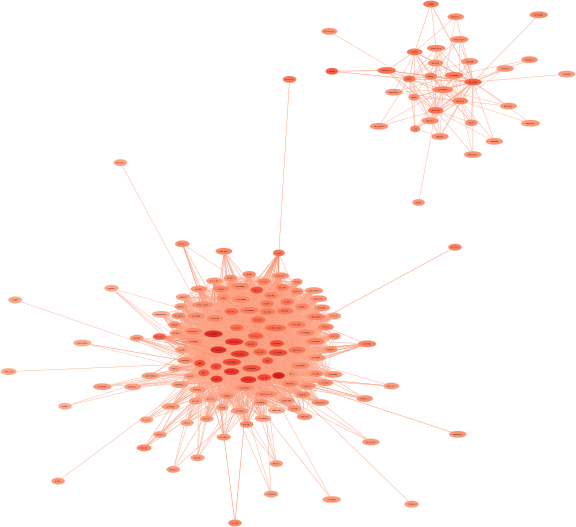

In [21]:
selected.plot_network()